<a href="https://colab.research.google.com/github/youngyoung-0/colab-notebook/blob/main/series_of_studying_by_myself/hanbit_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
# KNN classification

# preparing data
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

print(pd.unique(fish['Species']))

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
fish_input.head()

fish_target = fish['Species']

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [116]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [117]:
# standardized processing
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


In [118]:
# KNN classification
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target)) # 0.8907563025210085
print(kn.score(test_scaled, test_target)) # 0.85


0.8907563025210085
0.85


In [119]:
# multi-class classification
print(kn.predict(test_scaled[:5]))

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [120]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(indexes)
print(train_target.iloc[indexes[0]])



[[104 115 106]]
52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


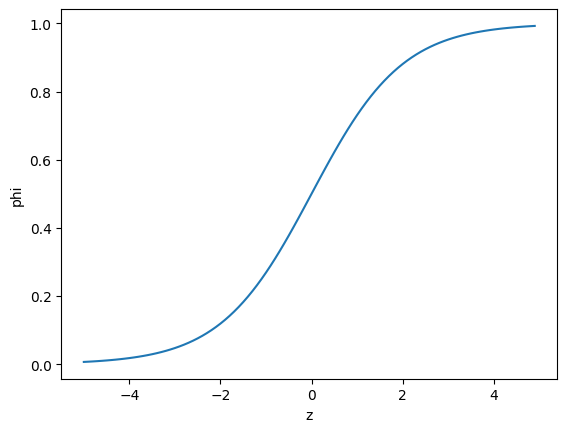

In [121]:
# binary logistic regression

import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [122]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

# These are the coefficient and intercept values of the Linear Regression model
print(lr.coef_, lr.intercept_)

# decision score
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

from scipy.special import expit
print(expit(decisions))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [123]:
# multinomial logistic regression
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [124]:
# predict
print(lr.predict(test_scaled[:5]))
proba = lr.predict_proba(test_scaled[:5])
print(lr.classes_)
print(np.round(proba, decimals=3))

print(lr.coef_.shape, lr.intercept_.shape)

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
(7, 5) (7,)


In [125]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
from scipy.special import softmax
# proba = softmax(decision, axis = 1)
# print(np.ro
# from und(proba, decimals=3))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
